In [24]:
#importing necessary libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10



In [25]:
#splitting dataset into train and test
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [26]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

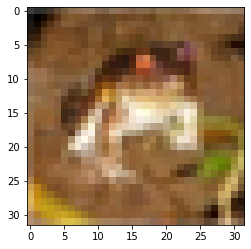

Label [6]


In [27]:
#Lets look at few samples
plt.imshow(X_train[0])
plt.show()
print("Label",y_train[0])

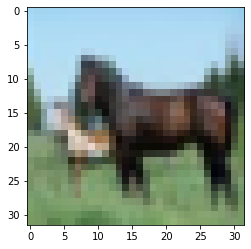

Label [7]


In [28]:
#Lets look at few samples
plt.imshow(X_train[12])
plt.show()
print("Label",y_train[12])

In [29]:
print("Shape of training dataset",X_train.shape)
print("Shape of test dataset",X_test.shape)

Shape of training dataset (50000, 32, 32, 3)
Shape of test dataset (10000, 32, 32, 3)


In [30]:
#For giving input to sequential model in keras we need to convert our dataset shape

X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0],-1))
print(X_train.shape)
print(X_test.shape)

(50000, 3072)
(10000, 3072)


In [31]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [32]:
y_train.shape

(50000, 10)

In [33]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [34]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Experiment3: Use different optimisers (Gradient Descent,Stochastic Gradient Descent, Mini-Batch Gradient Descent, Momentum Based Gradient Descent, Nesterov Accelerated Gradient, Adagrad, RMSProp, Adam)


In [35]:
def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Dense(100,input_dim=3072, activation= 'relu'))
  model.add(Dense(100, activation= 'relu'))
  model.add(Dense(100, activation= 'relu'))
  model.add(Dense(10, activation= 'softmax'))

  # Compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [36]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=100, verbose=1)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/20
500/500 [==============================] - 1s 2ms/step - loss: 3.0241 - accuracy: 0.1805
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.7255 - accuracy: 0.2357
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 0.2530
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.4183 - accuracy: 0.2709
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.2958
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3149 - accuracy: 0.3151
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3042 - accuracy: 0.3197
Epoch 8/20
500/500 [==============================] - 1s 2ms/step - loss: 0.2928 - accuracy: 0.3303
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.3434
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 0.2850 - accuracy: 0.3388

In [37]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.331940 using {'optimizer': 'Adamax'}
0.100000 (0.001840) with: {'optimizer': 'SGD'}
0.099460 (0.001945) with: {'optimizer': 'RMSprop'}
0.258800 (0.010455) with: {'optimizer': 'Adagrad'}
0.181740 (0.004581) with: {'optimizer': 'Adadelta'}
0.220158 (0.087903) with: {'optimizer': 'Adam'}
0.331940 (0.020306) with: {'optimizer': 'Adamax'}
0.198299 (0.066602) with: {'optimizer': 'Nadam'}


	Experiment4: Add Dropout and Batch Normalisation


In [67]:
from keras.constraints import maxnorm
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
	# create model
	model = Sequential()
  model.add(Dense(150,input_shape=(3072,),activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(100, activation= 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(100, activation= 'relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(10, activation= 'softmax'))


	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

IndentationError: ignored

In [48]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/100


ValueError: ignored